In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np 
matplotlib.rcParams['pdf.fonttype'] = 42

snp_bilan = pd.read_csv('/home/mouren/Data/variants/gnomad/exons_fabian/EE_SNP_type_bilan_effect_fabian.txt', header=0, sep='\t', index_col=0)
snp_bilan = snp_bilan.apply(pd.to_numeric, errors='coerce')

snp_bilan['sum_except_both'] = snp_bilan.drop(columns=['strong_both']).sum(axis=1) #we counted the strong both effect separately 

snp_bilan_T = snp_bilan.drop(columns=['strong_both','sum_except_both']).transpose()

<Figure size 500x500 with 0 Axes>

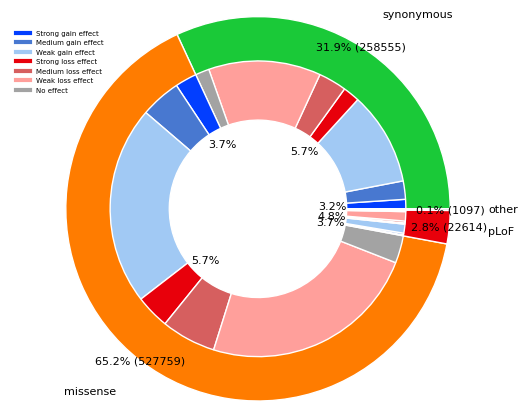

In [8]:
plt.figure(figsize=(5, 5))

# Create colors
palette_color = sns.color_palette('bright')
palette_2 = sns.color_palette('muted')
palette_3 = sns.color_palette('pastel')

# Pie chart
fig, ax = plt.subplots()
ax.axis('equal')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

def func1(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    syn = [8311,14863] #que les strong pour les catégories
    miss=[19294,30152]
    plof=[831,1085]
    if absolute in syn:
        pct = (absolute*100)/snp_bilan_T['synonymous'].sum()
        return "{:.1f}%".format(pct)
    elif absolute in miss:
        pct = (absolute*100)/snp_bilan_T['missense'].sum()
        return "{:.1f}%".format(pct)
    elif absolute in plof:
        pct = (absolute*100)/snp_bilan_T['pLoF'].sum()
        return "{:.1f}%".format(pct)

#first ring
mypie = ax.pie(snp_bilan['sum_except_both'], labels=snp_bilan.index, autopct=lambda pct: func(pct, snp_bilan['sum_except_both']), radius=1.3, colors=[palette_color[2],palette_color[1],palette_color[3],palette_color[7]], labeldistance=1.2, pctdistance=1, wedgeprops={'width': 0.4, 'edgecolor': 'white'}, textprops={'fontsize': 8})

#second ring
combined_list = snp_bilan_T['synonymous'].tolist() + snp_bilan_T['missense'].tolist() + snp_bilan_T['pLoF'].tolist() + snp_bilan_T['other'].tolist()
mypie2 = ax.pie(combined_list,autopct=lambda pct: func1(pct, combined_list), radius=1.3-0.3, colors=[palette_color[0],palette_2[0],palette_3[0],palette_color[3],palette_2[3],palette_3[3],palette_color[7]], labeldistance=0.8, pctdistance=0.5, textprops={'fontsize': 8}, wedgeprops={'width': 0.4, 'edgecolor': 'white'})

# add legend
custom_legend = [
    plt.Line2D([0], [0], color=palette_color[0], lw=3, label='Strong gain effect'),
    plt.Line2D([0], [0], color=palette_2[0], lw=3, label='Medium gain effect'),
    plt.Line2D([0], [0], color=palette_3[0], lw=3, label='Weak gain effect'),
    plt.Line2D([0], [0], color=palette_color[3], lw=3, label='Strong loss effect'),
    plt.Line2D([0], [0], color=palette_2[3], lw=3, label='Medium loss effect'),
    plt.Line2D([0], [0], color=palette_3[3], lw=3, label='Weak loss effect'),
    plt.Line2D([0], [0], color=palette_color[7], lw=3, label='No effect'),
]

# Add the legend to the plot
plt.legend(loc="upper left", handles=custom_legend, frameon=False, fontsize=5)

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_mat_met/gnomad_fabian_ee.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_mat_met/gnomad_fabian_ee.png", format="png", bbox_inches="tight", dpi=450)

plt.show()
